# Clustering

Some examples from https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # use seaborn for matplotlib plots

In [182]:
from sklearn.datasets.samples_generator import make_blobs

# xy = 4 clusters of 300 random (x, y) points
# labels = cluster index of each point 0, 1, 2, or 3
xy, labels = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

xy.shape, labels.shape

((300, 2), (300,))

In [12]:
xy[:4, :]

array([[ 0.83685684,  2.13635938],
       [-1.4136581 ,  7.40962324],
       [ 1.15521298,  5.09961887],
       [-1.01861632,  7.81491465]])

In [13]:
labels[:4]

array([1, 3, 0, 3])

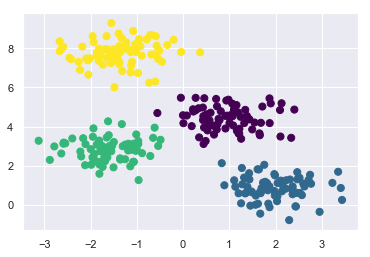

In [183]:
# plot the points colored by cluster label
plt.scatter(xy[:, 0], xy[:, 1], s=50, c=labels, cmap='viridis');

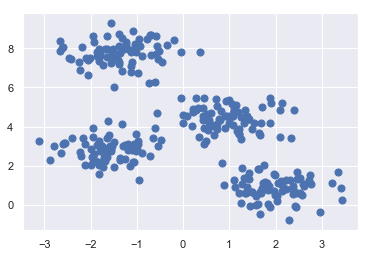

In [20]:
# plot the points without any knowledge of which cluster they belong to
plt.scatter(xy[:, 0], xy[:, 1], s=50);

# $k$-means clustering

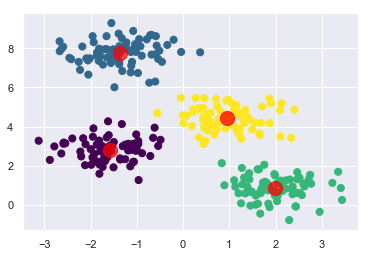

In [202]:
from sklearn.cluster import KMeans

# create an instance of the KMeans class and specify how many clusters it should find
kmeans = KMeans(n_clusters=4)

# run the k-means algorithm to cluster the 300 (x, y) points into the specified number of clusters
kmeans.fit(xy)

# klabels = the cluster index that k-means assigned to each point 0, 1, 2, or 3
klabels = kmeans.predict(xy)

# plot the points colored by cluster label
plt.scatter(xy[:, 0], xy[:, 1], s=50, c=klabels, cmap='viridis');

# show the cluster centers as black circles
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75);

### How $k$-means works

1. Choose random cluster centers.
2. Put each data point into the cluster whose center it is closest to.
3. Update the cluster centers to the mean of all points in the cluster.
4. Repeat 2-3 until cluster centers converge (i.e. don't change much anymore).

![kmeans EM algorithm](kmeans_EM.png "kmeans EM algorithm")

### The number of clusters must be selected beforehand.

### What if we guess some other number of clusters?

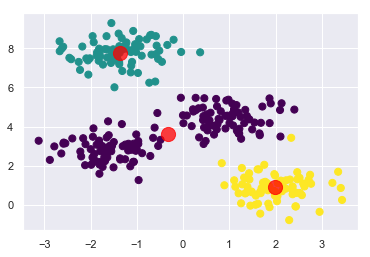

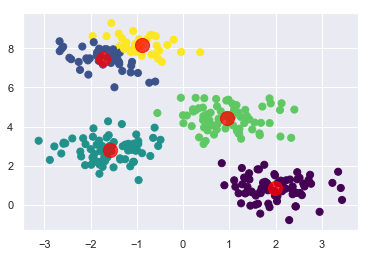

In [203]:
for n in [3, 5]:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(xy)
    klabels = kmeans.predict(xy)
    
    plt.figure()
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=klabels, cmap='viridis');
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75);

### Whay if we have more noise?

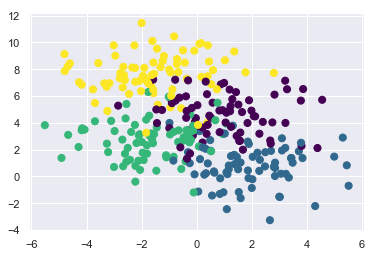

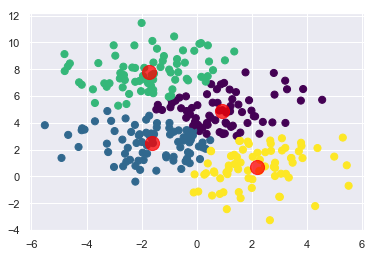

In [204]:
noisy, labels = make_blobs(n_samples=300, centers=4, cluster_std=1.5, random_state=0)

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(noisy)
klabels = kmeans.predict(noisy)

plt.figure()
plt.scatter(noisy[:, 0], noisy[:, 1], s=50, c=labels, cmap='viridis');

plt.figure()
plt.scatter(noisy[:, 0], noisy[:, 1], s=50, c=klabels, cmap='viridis');
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75);

![kmeans boundaries](sphx_glr_plot_kmeans_digits_0011.png "kmeans boundaries")

### $k$-means can only fit round blobs. For anything else you'll need a different algorithm.

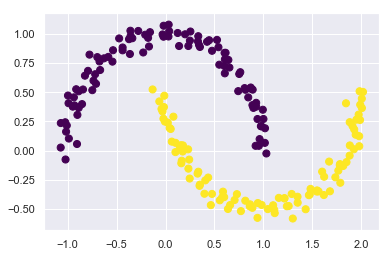

In [41]:
from sklearn.datasets import make_moons

moons, labels = make_moons(200, noise=.05, random_state=0)

plt.scatter(moons[:, 0], moons[:, 1], c=labels, s=50, cmap='viridis');

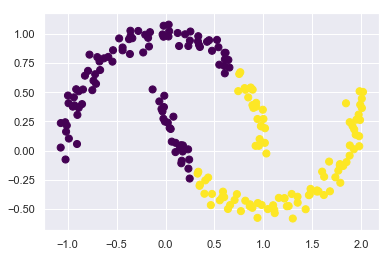

In [42]:
klabels = KMeans(2, random_state=0).fit_predict(moons)

plt.scatter(moons[:, 0], moons[:, 1], c=klabels, s=50, cmap='viridis');

### Other clustering algorithms may be better suited to different types of data.

/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


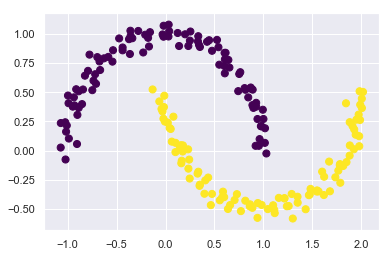

In [43]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

slabels = model.fit_predict(moons)

plt.scatter(moons[:, 0], moons[:, 1], c=slabels, s=50, cmap='viridis');

### No clustering algorithm is perfect for everything. You'll have to assess the pros and cons based on your data.

Here are examples of how several algorithms perform on various types of data.

Some handy info on these methods at https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods

Code at https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

![clustering algorithms](sphx_glr_plot_cluster_comparison_0011.png "Clustering Algorithms")

# Mean-Shift clustering

1. Start at a random point and specify a radius around that point.
2. Move to the mean of all the points within the specified radius.
3. Repeat 1-2 until converged (point no longer moves).

![mean-shift single window](mean-shift_single_window.gif "Mean-Shift Single Window")

* For multiple clusters, start with a grid of points spaced over the entire data.
* Points that converge to locations within their radii are merged.
* Thus, you don't have to specify the numer of clusters, the algorithm will attempt to find the optimal number.
* !!! However, results depend on the selected radius.

![mean-shift many windows](mean-shift_many_windows.gif "Mean-Shift Many Windows")

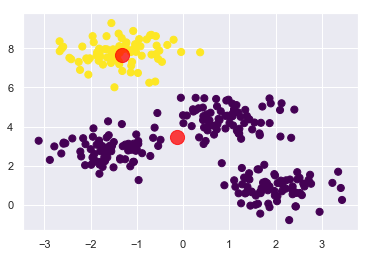

In [207]:
from sklearn.cluster import MeanShift

ms = MeanShift()
ms.fit(xy)

plt.scatter(xy[:, 0], xy[:, 1], s=50, c=ms.labels_, cmap='viridis');
plt.scatter(ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1], c='red', s=200, alpha=0.75);

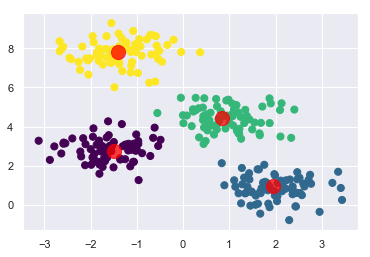

In [208]:
ms = MeanShift(bandwidth=1)
ms.fit(xy)

plt.scatter(xy[:, 0], xy[:, 1], s=50, c=ms.labels_, cmap='viridis');
plt.scatter(ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1], c='red', s=200, alpha=0.75);

1.4289741801666231


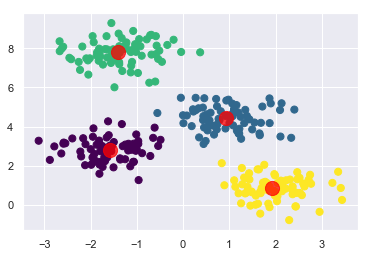

In [209]:
# bandwidth estimated from 20% quantile of all pairwise distances
bandwidth = estimate_bandwidth(xy, quantile=0.2)

print(bandwidth)

ms = MeanShift(bandwidth=bandwidth)
ms.fit(xy)

plt.scatter(xy[:, 0], xy[:, 1], s=50, c=ms.labels_, cmap='viridis');
plt.scatter(ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1], c='red', s=200, alpha=0.75);

2.545993523104276


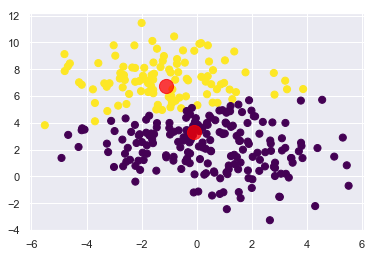

In [210]:
bandwidth = estimate_bandwidth(noisy, quantile=0.2)

print(bandwidth)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(noisy)

plt.scatter(noisy[:, 0], noisy[:, 1], s=50, c=ms.labels_, cmap='viridis');
plt.scatter(ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1], c='red', s=200, alpha=0.75);

1.7540137512544727


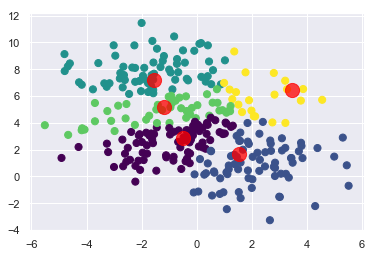

In [211]:
bandwidth = estimate_bandwidth(noisy, quantile=0.1)

print(bandwidth)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(noisy)

plt.scatter(noisy[:, 0], noisy[:, 1], s=50, c=ms.labels_, cmap='viridis');
plt.scatter(ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1], c='red', s=200, alpha=0.75);

# Gaussian Mixture Model (GMM)

* Need to specify the number of clusters.
* Unlike $k$-means which can only handle round (e.g. circular) blobs, GMMs can fit eliptical blobs.
* Each data point can belong to multiple clusters with a certain probability to be in each cluster (i.e. clusters can overlap).

![GMM](gmm.gif "GMM")

![overlap clusters](overlapping_gaussians.png "Overlapping Clusters")

![overlap GMM](overlapping_gaussians2.png "Overlapping GMM")

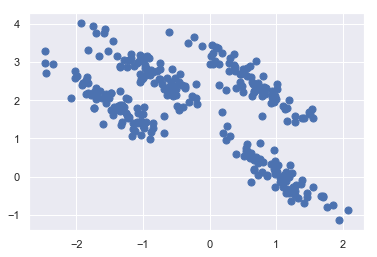

In [104]:
rng = np.random.RandomState(13)

stretched = xy @ rng.randn(2, 2)

plt.scatter(stretched[:, 0], stretched[:, 1], s=50);

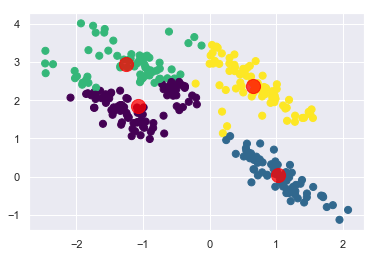

In [219]:
kmeans = KMeans(n_clusters=4, random_state=5)
kmeans.fit(stretched)
klabels = kmeans.predict(stretched)

plt.scatter(stretched[:, 0], stretched[:, 1], s=50, c=klabels, cmap='viridis');
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75);

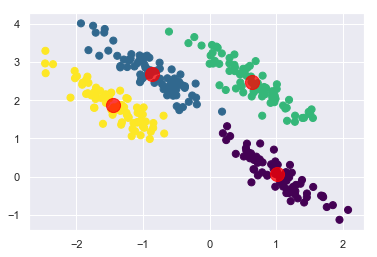

In [230]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=5)
gmm.fit(stretched)
glabels = gmm.predict(stretched)

plt.scatter(stretched[:, 0], stretched[:, 1], s=50, c=glabels, cmap='viridis');
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200, alpha=0.75);

In [221]:
gmm.converged_

True

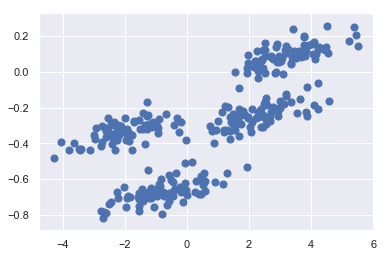

In [222]:
rng = np.random.RandomState(14)

stretched2 = xy @ rng.randn(2, 2)

plt.scatter(stretched2[:, 0], stretched2[:, 1], s=50);

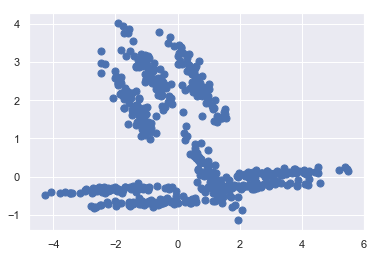

In [223]:
overlapped = np.vstack([stretched, stretched2])

plt.scatter(overlapped[:, 0], overlapped[:, 1], s=50);

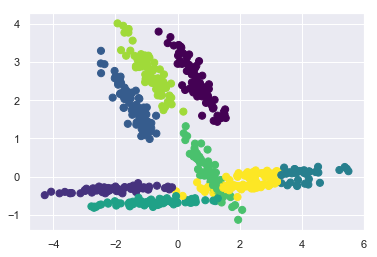

In [374]:
gmm = GaussianMixture(n_components=8, random_state=1)
gmm.fit(overlapped)
glabels = gmm.predict(overlapped)

plt.scatter(overlapped[:, 0], overlapped[:, 1], s=50, c=glabels, cmap='viridis');

In [375]:
# Probability that each point belongs to each of the 8 clusters.
probs = gmm.predict_proba(overlapped)

probs[:9, :].round(3)

array([[0.   , 0.   , 0.972, 0.   , 0.   , 0.002, 0.026, 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.999, 0.   , 0.   , 0.   , 0.001, 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.68 , 0.201, 0.   , 0.119],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]])

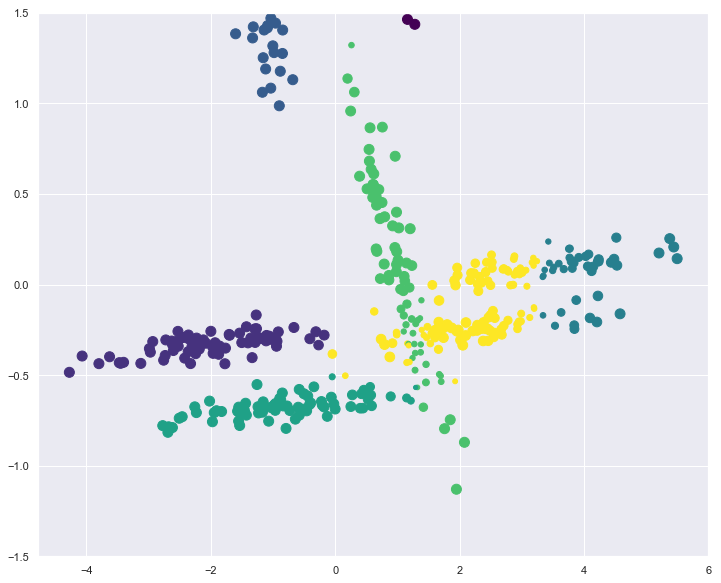

In [377]:
size = 100 * probs.max(axis=1)**2  # square emphasizes differences

plt.figure(figsize=(12, 10))
plt.scatter(overlapped[:, 0], overlapped[:, 1], s=size, c=glabels, cmap='viridis');
plt.ylim([-1.5, 1.5]);

# Heirarchical Agglomerative clustering

Start with all data points in separate clusters and iteravely combine the closest clusters together. 

![HAC](hac.gif "HAC")

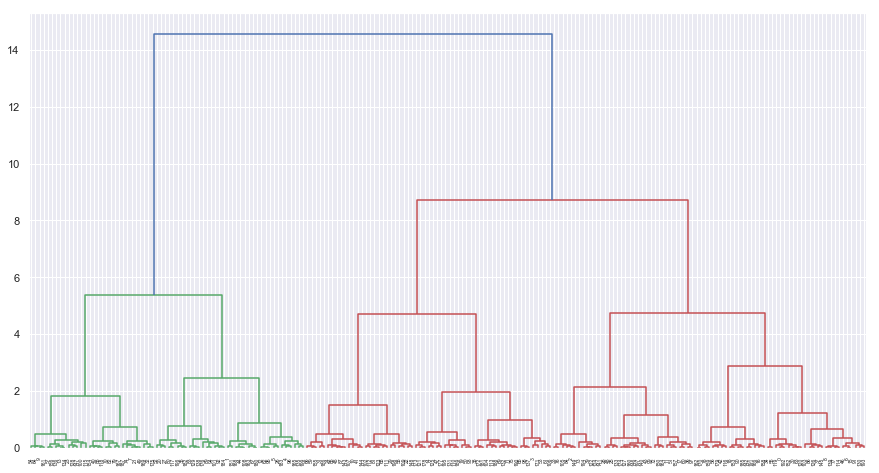

In [81]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15, 8))
sch.dendrogram(sch.linkage(moons, method='ward'));

# ward minimizes the variance of the clusters being merged

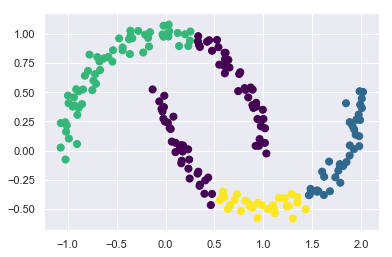

In [79]:
from sklearn.cluster import AgglomerativeClustering

hac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hlabels = hac.fit_predict(moons)

plt.scatter(moons[:, 0], moons[:, 1], c=hlabels, s=50, cmap='viridis');

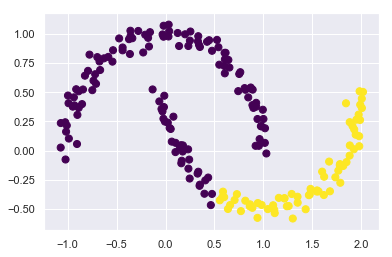

In [80]:
hac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hlabels = hac.fit_predict(moons)

plt.scatter(moons[:, 0], moons[:, 1], c=hlabels, s=50, cmap='viridis');

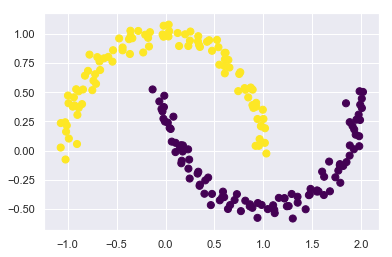

In [82]:
hac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
hlabels = hac.fit_predict(moons)

plt.scatter(moons[:, 0], moons[:, 1], c=hlabels, s=50, cmap='viridis');

# Density-Based Spatial Clustering (DBSCAN)

![DBSCAN](dbscan.gif "DBSCAN")

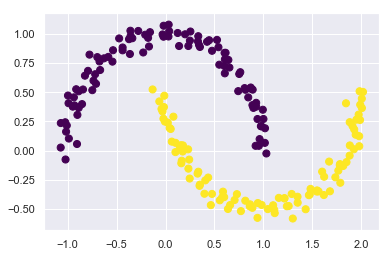

In [91]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10)
db.fit(moons)

plt.scatter(moons[:, 0], moons[:, 1], c=db.labels_, s=50, cmap='viridis');

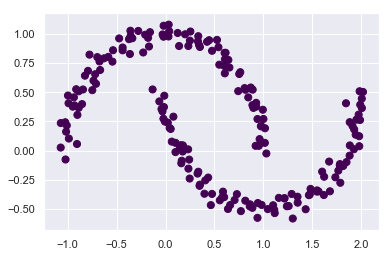

In [92]:
db = DBSCAN(eps=0.5, min_samples=10)
db.fit(moons)

plt.scatter(moons[:, 0], moons[:, 1], c=db.labels_, s=50, cmap='viridis');

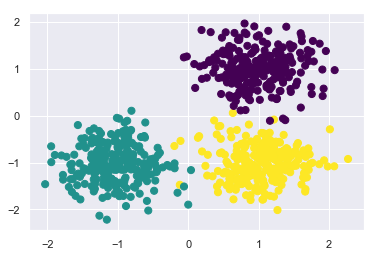

In [96]:
centers = [[1, 1], [-1, -1], [1, -1]]
blobs, labels = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

plt.scatter(blobs[:, 0], blobs[:, 1], c=labels, s=50, cmap='viridis');

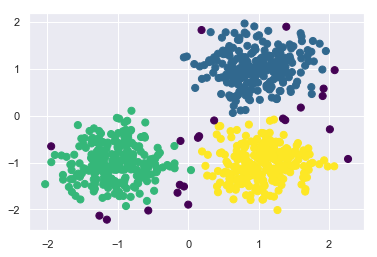

In [102]:
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(blobs)

plt.scatter(blobs[:, 0], blobs[:, 1], c=db.labels_, s=50, cmap='viridis');

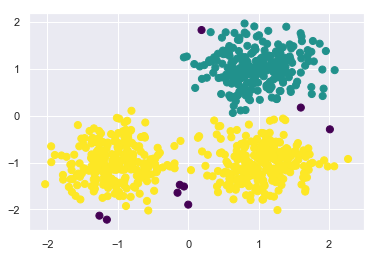

In [103]:
# try changing the eps and min_samples parameters and see how your results change
db = DBSCAN(eps=0.3, min_samples=5)
db.fit(blobs)

plt.scatter(blobs[:, 0], blobs[:, 1], c=db.labels_, s=50, cmap='viridis');

# GMMs: How many components to choose?

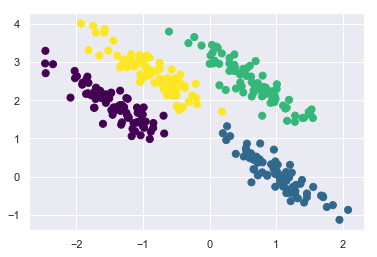

In [239]:
gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(stretched)
glabels = gmm.predict(stretched)

plt.scatter(stretched[:, 0], stretched[:, 1], s=50, c=glabels, cmap='viridis');

### Objective functions such as Bayesian Information Criterion (BIC)

### $BIC = ln(n) * k - 2 * ln(L)$

* $k$ = number of model parameters (Gaussian centers, standard deviations, and rotations)
* $n$ = number of data points
* $L$ = likelihood of the model given the data

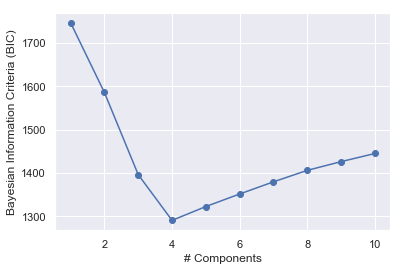

In [240]:
n_components = np.arange(1, 11)

models = [GaussianMixture(n, random_state=0) for n in n_components]

for model in models:
    model.fit(stretched)

bic = [model.bic(stretched) for model in models]

plt.plot(n_components, bic, 'o-', label='BIC')
plt.xlabel('# Components');
plt.ylabel('Bayesian Information Criteria (BIC)');

# GMMs as generative models.

A GMM is a probability distribution model, so we can generate random samples from it just like we would draw random samples from a one dimensional probability distribution that we delt with earlier in this class.

Example from https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

In [242]:
from sklearn.datasets import load_digits

digits = load_digits()

# 1797 8x8 grayscale images
digits.data.shape

(1797, 64)

In [357]:
def plot_digits(data, rows=10, cols=10):
    fig, ax = plt.subplots(rows, cols, figsize=(rows, cols), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)

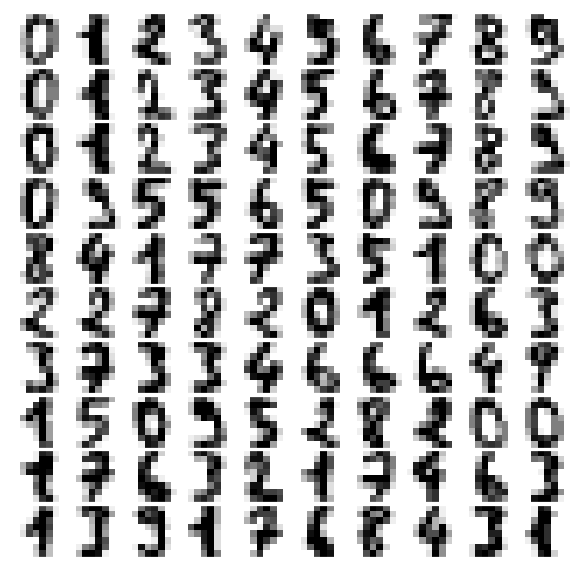

In [358]:
plot_digits(digits.data)

### Reduce dimensionality of the data to make it easier for the GMM.

In [245]:
from sklearn.decomposition import PCA

# PCA accounting for 99% of variability in digit images.
pca = PCA(0.99, whiten=True)
projected = pca.fit_transform(digits.data)

# Each image projected onto only 41 PCs.
# Rememeber, each PC is an axis in the original 64-dimensional space.
projected.shape

(1797, 41)

In [246]:
# Let's look at what our projected images look like.
unprojected = pca.inverse_transform(projected)

unprojected.shape

(1797, 64)

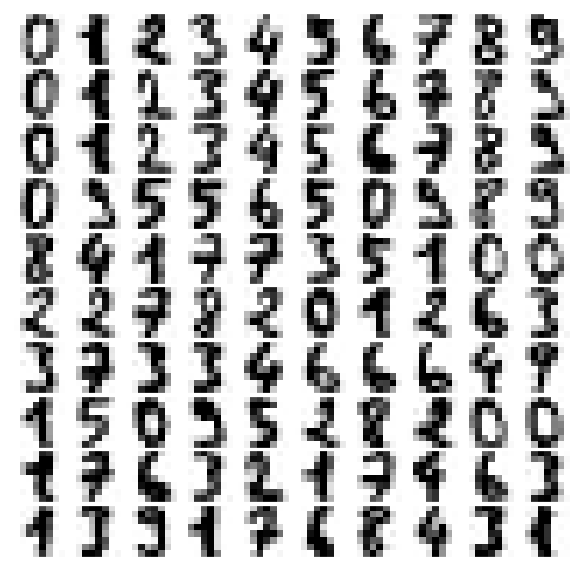

In [247]:
plot_digits(unprojected)

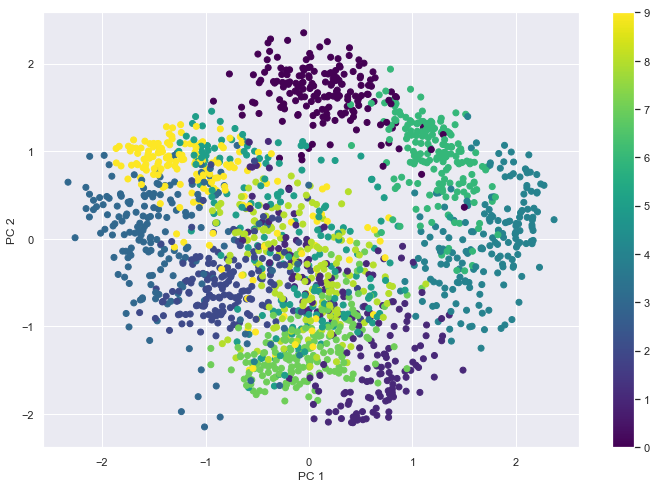

In [252]:
# Plot projected images as points in first two PCs.
plt.figure(figsize=(12, 8))
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, cmap='viridis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar();

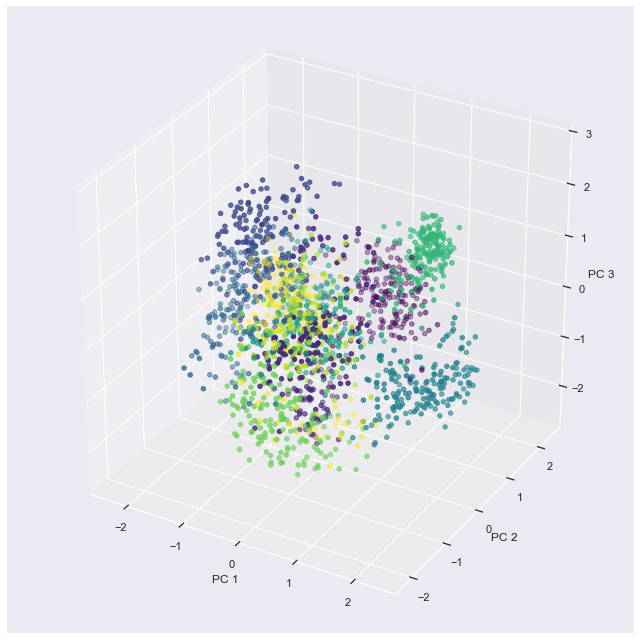

In [323]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2], c=digits.target, cmap='viridis')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
fig.tight_layout();

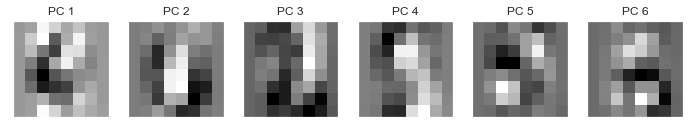

In [372]:
# The PCs are themselves different mixtures of the original 64-dimensions (i.e. mixtures of the 64 pixels in the images).
fig, ax = plt.subplots(1, 6, figsize=(12, 2))
for i in range(6):
    ax[i].imshow(pca.components_[i].reshape(8, 8), cmap='binary')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(f'PC {i+1}')

### Fit GMM to 41-dimensional projected data.

Goal is to find clusters of hand drawn images.

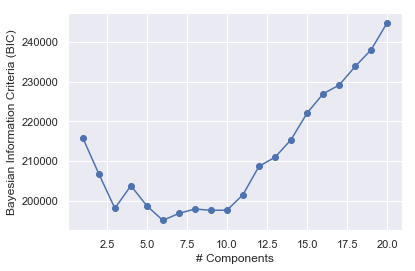

In [270]:
# First lets see how many clusters we should use to fit the data.
n_components = np.arange(1, 21, 1)
models = [GaussianMixture(n, random_state=0) for n in n_components]

for model in models:
    model.fit(projected)

bic = [model.bic(projected) for model in models]

plt.plot(n_components, bic, 'o-', label='BIC')
plt.xlabel('# Components');
plt.ylabel('Bayesian Information Criteria (BIC)');

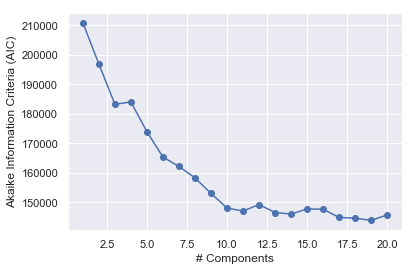

In [306]:
aic = [model.aic(projected) for model in models]

plt.plot(n_components, aic, 'o-', label='AIC')
plt.xlabel('# Components');
plt.ylabel('Akaike Information Criteria (AIC)');

In [349]:
# Now fit the reduced-dimensionality data with the chosen number of Gaussians.
gmm = GaussianMixture(10, random_state=0)

gmm.fit(projected)

gmm.converged_

True

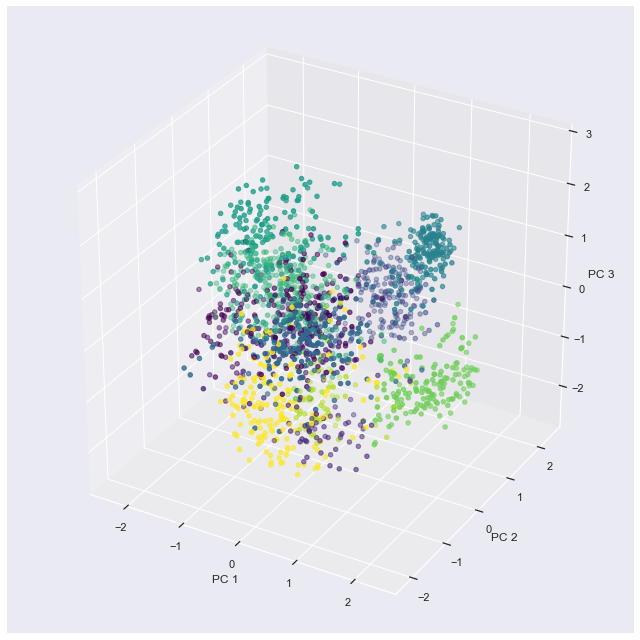

In [350]:
# Gaussian cluster labels for each projected data point (i.e. PCA projected image)
glabels = gmm.predict(projected)

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2], c=glabels, cmap='viridis')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
fig.tight_layout();

In [351]:
# Grab 100 random samples from our GMM (i.e. mixture of Gaussians).
sample_projected_images, cluster_labels = gmm.sample(100)

# We got both sample points in our 41-dimensional PC space (i.e. new random projected images) and the clusters those points came from.
sample_projected_images.shape, cluster_labels.shape

((100, 41), (100,))

In [352]:
# Relate cluster labels to digits.
# digits.target is a list of the number that was drawn in each of our original images
digits.target[:30].reshape(3, 10)

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [353]:
# glables are the cluster labels for each of the projected images we fit the GMM to
glabels[:30].reshape(3, 10)

array([[2, 3, 8, 6, 7, 6, 4, 9, 0, 6],
       [2, 8, 5, 0, 7, 1, 4, 9, 3, 6],
       [2, 8, 5, 0, 8, 3, 4, 1, 0, 6]])

In [354]:
# we know the transform between the 41-dim PC space and the 64-dim original image space
# thus, we can transform our sampled images from the 41-dim PC space back to out original 64-dim image space
sample_images = pca.inverse_transform(sample_projected_images)

sample_images.shape

(100, 64)

In [355]:
# here are the clusters that each of the 100 sample images came from
cluster_labels.reshape(10, 10)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 4, 4, 4, 4, 4, 4],
       [4, 4, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6, 7, 7],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 8],
       [8, 8, 8, 8, 8, 9, 9, 9, 9, 9]])

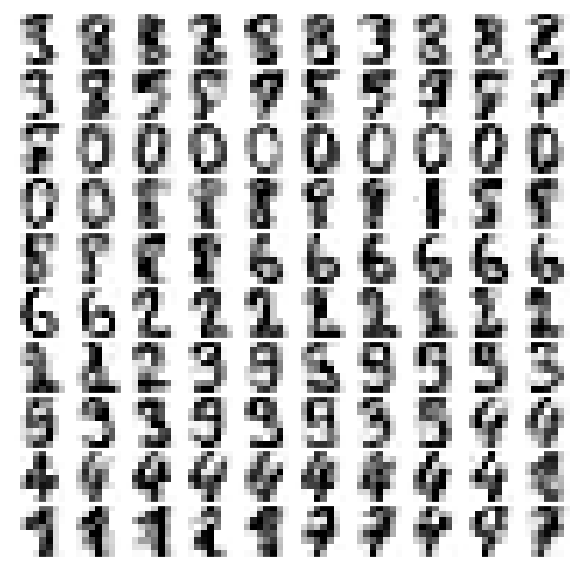

In [356]:
# Here are our computer drawn digits based on a GMM model of PCA dimension-reduced human drawn digits.
plot_digits(sample_images)

# EEG recordings, PCA and Clustering

Image from https://www.biorxiv.org/content/10.1101/373571v2.full

![EEG](F3.large.jpg "EEG")